EXPLORATORY DATA ANALYSIS

GOOGLE_PLAYSTORE_APPS_DATASET

INTRODUCTION

This dataset contains detailed information about 10,841 mobile applications published on the Google Play Store. It provides a comprehensive view of each app’s characteristics, user engagement metrics, pricing, and technical requirements. The dataset is useful for market analysis, rating prediction, trend analysis, app category research, and exploratory data analysis (EDA).

The dataset contains 13 columns that collectively describe various characteristics of mobile applications listed on the Google Play Store. It includes basic app information such as the application name, its category, and a more specific genre classification. The dataset also captures user feedback through the average app rating—although some ratings are missing—and the number of user reviews, which are stored as text and require cleaning. Details related to an app’s size and reach are provided through the size column, which contains values like “12M” or “Varies with device,” and the installs column, which records the total number of installations in a formatted text form. Information about pricing and type is included as well, indicating whether an app is free or paid, along with its listed price. Additionally, the dataset offers insights into content suitability and technical requirements, containing fields such as content rating for age appropriateness, the date the app was last updated, the current version of the application, and the minimum Android version required for installation. This collection of features provides a comprehensive foundation for analyzing app performance, user engagement, and market behavior on the Google Play Store.

The primary objective of this dataset is to analyze and understand the factors that influence the performance, popularity, and quality of apps on the Google Play Store.
It enables data analysts, researchers, and developers to explore how different app features relate to user ratings, installs, categories, pricing, and overall user engagement.

Import Necessory Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Import Dataset

In [4]:

df=pd.read_csv("C:\DATASCIENCE\DATASET\CSV\googleplaystore.csv")


Display the first 5 rows of the Dataset

In [19]:
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

Display the last 5 Rows of the DataSet

In [20]:
print(df.tail())

                                                 App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Educa

## Data Cleaning

### check whether there are any missing values

In [21]:
print(df.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


### Fill Rating column with mean

In [22]:

mean_Rating=df['Rating'].mean()
df['Rating'].fillna(mean_Rating,inplace=True)
print(df['Rating'].head(15))

0     4.1
1     3.9
2     4.7
3     4.5
4     4.3
5     4.4
6     3.8
7     4.1
8     4.4
9     4.7
10    4.4
11    4.4
12    4.2
13    4.6
14    4.4
Name: Rating, dtype: float64


 ### Drop rows with missing values in current version

In [23]:
df.dropna(subset=['Current Ver'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10833 non-null  object 
 1   Category        10833 non-null  object 
 2   Rating          10833 non-null  float64
 3   Reviews         10833 non-null  object 
 4   Size            10833 non-null  object 
 5   Installs        10833 non-null  object 
 6   Type            10832 non-null  object 
 7   Price           10833 non-null  object 
 8   Content Rating  10832 non-null  object 
 9   Genres          10833 non-null  object 
 10  Last Updated    10833 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### Remove spaces from column names

In [24]:
df.columns = df.columns.str.replace(' ','_')

### Check for duplicate rows

In [25]:
df.duplicated().sum()

483

### Delete duplicated rows

In [26]:
df.drop_duplicates(inplace=True)

### Apps with Rating not equal to 4.0

In [27]:
not_four = df[df['Rating'] != 4.0]
print(not_four.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content_Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last_Updated         Current_Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### Apps with Reviews less than 1000

In [ ]:
few_reviews = df[df['Reviews'].astype(float) < 1000]
print(few_reviews.head())


                                              App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   
4           Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                      Paper flowers instructions  ART_AND_DESIGN     4.4   
6         Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   

   Reviews  Size  Installs  Type Price Content Rating  \
0    159.0   19M   10,000+  Free     0       Everyone   
1    967.0   14M  500,000+  Free     0       Everyone   
4    967.0  2.8M  100,000+  Free     0       Everyone   
5    167.0  5.6M   50,000+  Free     0       Everyone   
6    178.0   19M   50,000+  Free     0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15       2.0.0 

### Apps with Rating greater than 4.5

In [ ]:
high_rating = df[df['Rating'] >= 4.5]
print(high_rating)

                                                     App             Category  \
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
13                                 Mandala Coloring Book       ART_AND_DESIGN   
16          Photo Designer - Write your name with shapes       ART_AND_DESIGN   
...                                                  ...                  ...   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews    

### Apps with Rating Less Than 3

In [5]:
low_rating = df[df['Rating'] < 3]
low_rating[['App', 'Rating']].head()


,App,Rating
477,Calculator,2.6
518,Just She - Top Lesbian Dating,1.9
520,EliteSingles – Dating for Single Professionals,2.5
527,Sugar Daddy Dating App,2.5
528,Adult Dirty Emojis,2.8


### Free Apps (Type == 'Free')

In [6]:
free_apps = df[df['Type'] == 'Free']
free_apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Paid Apps (Type != 'Free')

In [7]:
paid_apps = df[df['Type'] != 'Free']
paid_apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


### Apps with Installs Greater Than 1 Million

In [8]:
# Clean Installs column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

popular_apps = df[df['Installs'] > 1_000_000]
popular_apps[['App', 'Installs']].head()


,App,Installs
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0
3,Sketch - Draw & Paint,50000000.0
12,Tattoo Name On My Photo Editor,10000000.0
18,FlipaClip - Cartoon animation,5000000.0
19,ibis Paint X,10000000.0


### Apps with Rating Between 4 and 4.5

In [10]:
mid_rating = df[(df['Rating'] >= 4.0) & (df['Rating'] <= 4.5)]
mid_rating[['App', 'Rating']].head()


,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
5,Paper flowers instructions,4.4
7,Infinite Painter,4.1


### Apps Belonging to a Specific Category

In [11]:
game_apps = df[df['Category'] == 'GAME']
game_apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,1.000000e+08,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,5.000000e+08,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,1.000000e+07,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,1.000000e+07,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


### Multiple Conditions (High Rating & Free Apps)

In [12]:
top_free_apps = df[(df['Rating'] > 4.5) & (df['Type'] == 'Free')]
top_free_apps[['App', 'Rating']].head()


,App,Rating
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
9,Kids Paint Free - Drawing Fun,4.7
13,Mandala Coloring Book,4.6
16,Photo Designer - Write your name with shapes,4.7
19,ibis Paint X,4.6


## Data Understanding

### Basic information about the dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10350 non-null  object 
 1   Category        10350 non-null  object 
 2   Rating          10350 non-null  float64
 3   Reviews         10350 non-null  object 
 4   Size            10350 non-null  object 
 5   Installs        10350 non-null  object 
 6   Type            10349 non-null  object 
 7   Price           10350 non-null  object 
 8   Content_Rating  10349 non-null  object 
 9   Genres          10350 non-null  object 
 10  Last_Updated    10350 non-null  object 
 11  Current_Ver     10350 non-null  object 
 12  Android_Ver     10347 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


### Use summary statistics to understand distributions.

In [ ]:
print(df.describe())


             Rating
count  10350.000000
mean       4.190200
std        0.505504
min        1.000000
25%        4.100000
50%        4.200000
75%        4.500000
max       19.000000


In [ ]:
print(df.shape)

(10841, 13)


In [ ]:
import pandas as pd
df = pd.read_csv("C:\DATASCIENCE\DATASET\CSV\googleplaystore.csv")
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


### 1.How many missing values exist in each column of the dataset?

In [ ]:

missing_counts = df.isnull().sum()

print("Missing values in each column:")
print(missing_counts)



Missing values in each column:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


## Univariate Analysis

### Rating Distribution

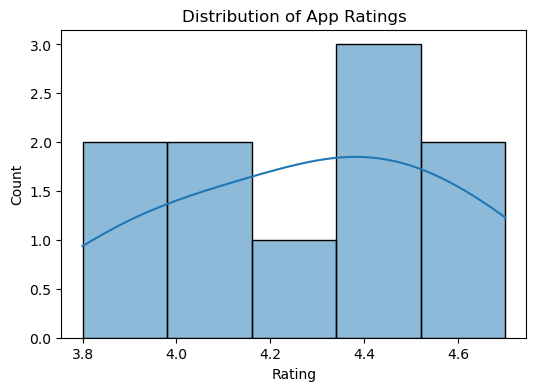

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.head(10)['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.show()

## Bivariate Analysis

### Rating vs Reviews

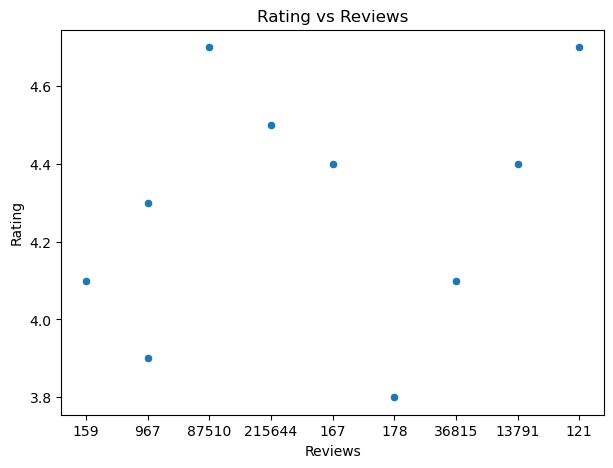

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Reviews', y='Rating', data=df.head(10))
plt.title('Rating vs Reviews')
plt.show()

## Multivariate Analysis

### Group by Category-Average Rating


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\DATASCIENCE\DATASET\CSV\googleplaystore.csv")

category_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
print(category_rating)

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

### Pivot Table — Sum of Reviews by Category

In [ ]:
df['Reviews'] = pd.to_numeric(df["Reviews"], errors="coerce")

pivot2 = pd.pivot_table(
    df,
    values='Reviews',
    index='Category',
    aggfunc='sum'
)

print(pivot2)

                          Reviews
Category                         
1.9                  0.000000e+00
ART_AND_DESIGN       1.714440e+06
AUTO_AND_VEHICLES    1.163666e+06
BEAUTY               3.962400e+05
BOOKS_AND_REFERENCE  2.195907e+07
BUSINESS             1.395455e+07
COMICS               3.383276e+06
COMMUNICATION        8.154623e+08
DATING               7.291278e+06
EDUCATION            3.959579e+07
ENTERTAINMENT        5.917815e+07
EVENTS               1.610180e+05
FAMILY               4.102263e+08
FINANCE              1.755073e+07
FOOD_AND_DRINK       8.883330e+06
GAME                 1.585422e+09
HEALTH_AND_FITNESS   3.789374e+07
HOUSE_AND_HOME       3.976385e+06
LIBRARIES_AND_DEMO   1.037118e+06
LIFESTYLE            1.288278e+07
MAPS_AND_NAVIGATION  3.065925e+07
MEDICAL              1.585975e+06
NEWS_AND_MAGAZINES   5.440086e+07
PARENTING            9.583310e+05
PERSONALIZATION      8.934614e+07
PHOTOGRAPHY          2.135166e+08
PRODUCTIVITY         1.141170e+08
SHOPPING      

### Category Count

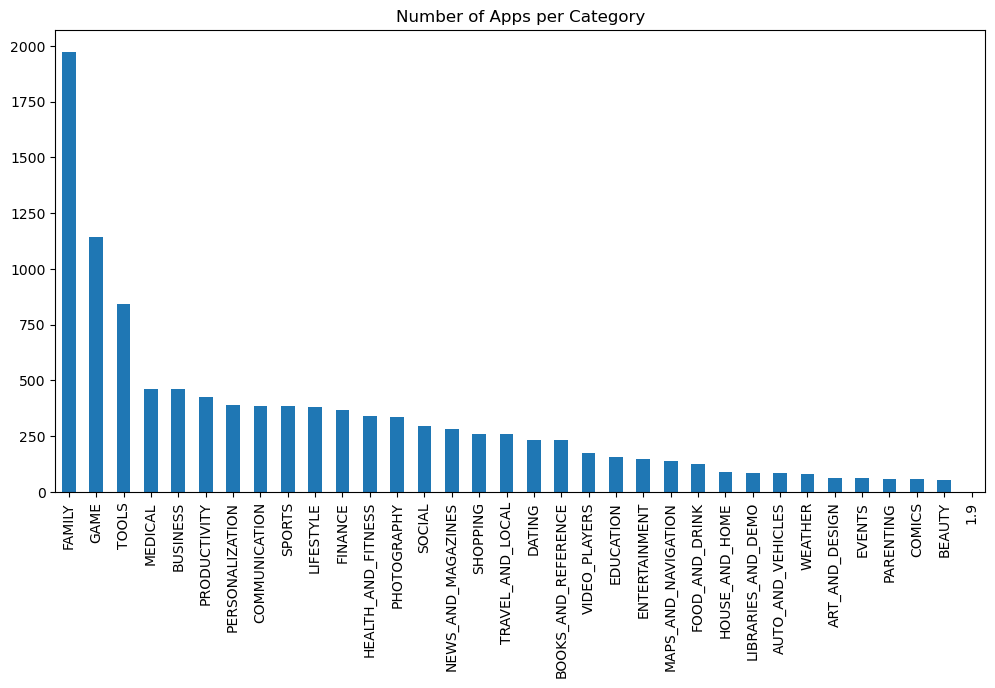

In [ ]:
plt.figure(figsize=(12,6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Number of Apps per Category')
plt.show()

### Installs vs Rating

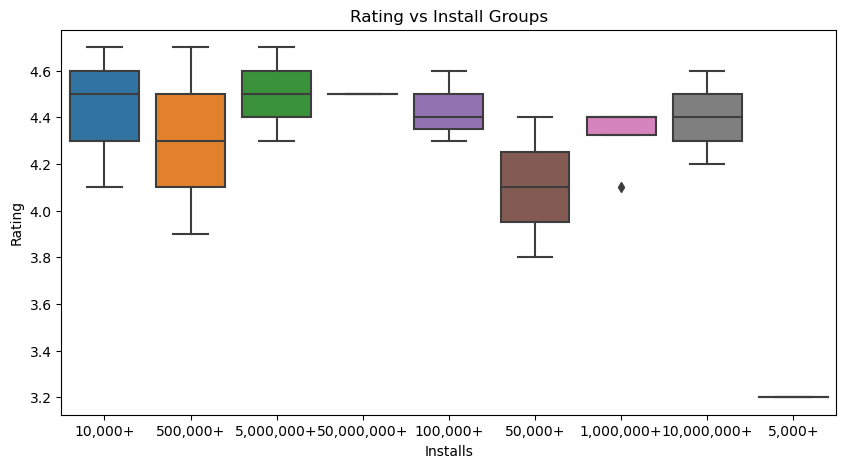

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Installs', y='Rating', data=df.head(20))
plt.title('Rating vs Install Groups')
plt.show()

## Correlation Analysis

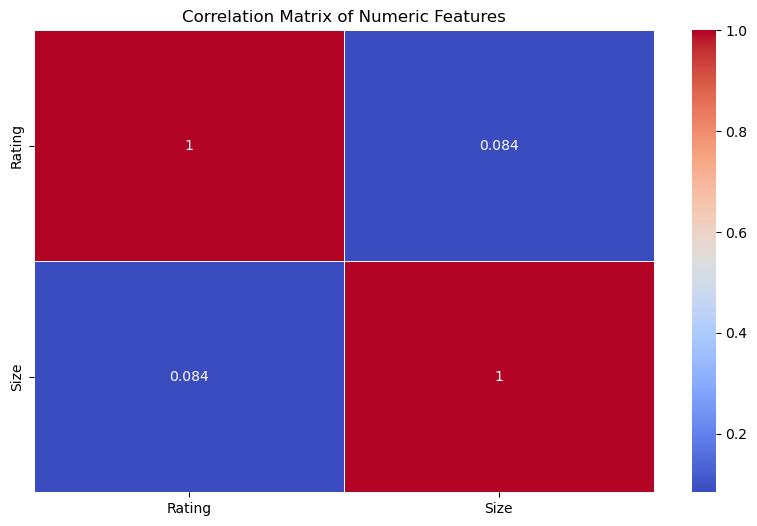

In [ ]:
#Select Only Numeric Columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()
#Compute the Correlation Matrix
corr = numeric_df.corr()
#Visualize the Correlation Using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Category-wise Rating Analysis

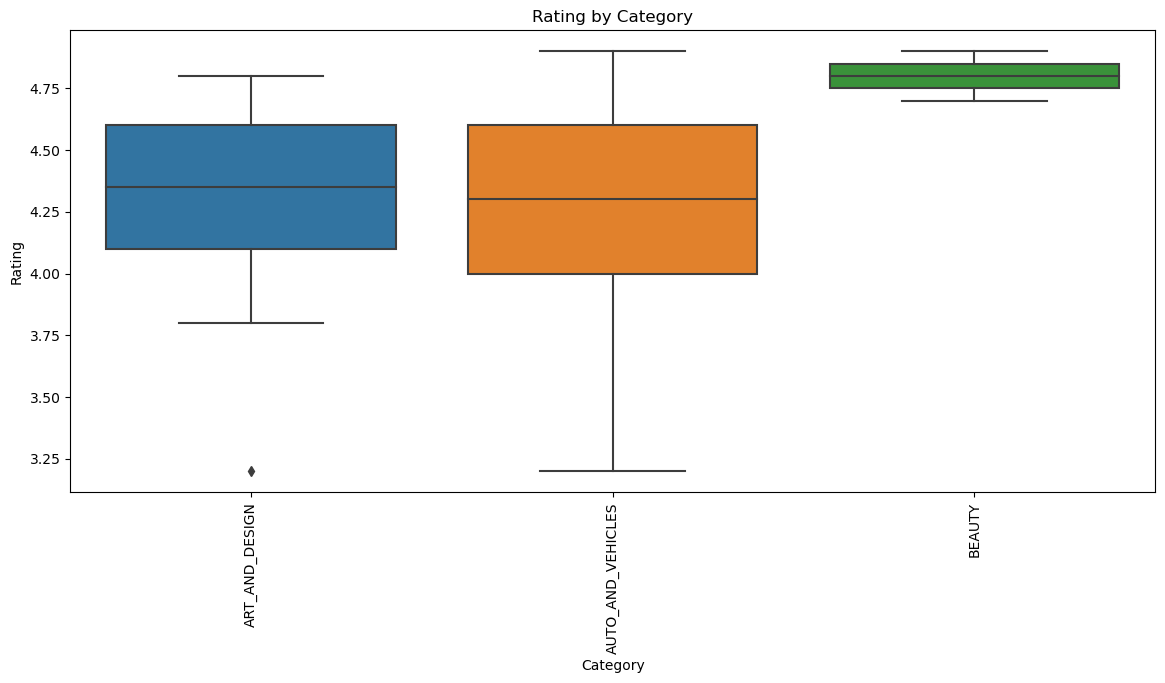

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Category', y='Rating', data=df.head(100))
plt.xticks(rotation=90)
plt.title('Rating by Category')
plt.show()

### Top 10 Installed Apps

In [ ]:
top_installed = df.sort_values(by='Installs', ascending=False).head(10)
print(top_installed[['App', 'Installs', 'Rating']])

                                               App      Installs  Rating
10472      Life Made WI-Fi Touchscreen Photo Frame          Free    19.0
420    UC Browser - Fast Download Private & Secure  500,000,000+     4.5
474                    LINE: Free Calls & Messages  500,000,000+     4.2
3767                  Flipboard: News For Our Time  500,000,000+     4.4
3574                                   Cloud Print  500,000,000+     4.1
3326                  Gboard - the Google Keyboard  500,000,000+     4.2
431                                Viber Messenger  500,000,000+     4.3
4222                 imo free video calls and chat  500,000,000+     4.3
3235                              Google Translate  500,000,000+     4.4
1842                              Candy Crush Saga  500,000,000+     4.4


### What is the distribution of app ratings? Are there outliers?

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64


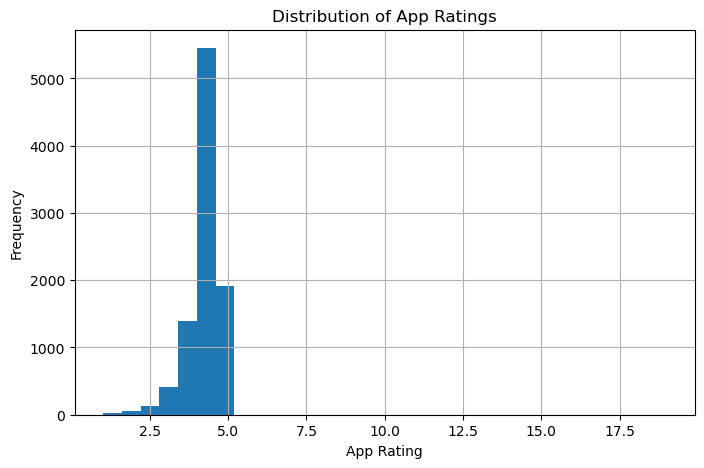

Number of outliers in 'Rating': 504


,App,Rating
15,Learn To Draw Kawaii Characters,3.2
87,RST - Sale of cars on the PCT,3.2
209,Plugin:AOT v5.0,3.1
311,comico Popular Original Cartoon Updated Everyd...,3.2
312,Daily Manga - Comic & Webtoon,3.2
...,...,...
10665,SB · FN 1870 Mobile Banking,2.9
10677,Pint - FN Theme,2.5
10715,FarmersOnly Dating,3.0
10757,Fisher-Price® Smart Connect™,2.7


In [ ]:

print(df['Rating'].describe())
#plot the rating distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['Rating'].hist(bins=30)
plt.xlabel("App Rating")
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")
plt.show()

#Detect outliers
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]

print("Number of outliers in 'Rating':", len(outliers))

#list outliers
outliers[['App', 'Rating']]

### What percentage of apps are free vs paid (Type column)?


In [ ]:

# Count apps by Type
type_counts = df['Type'].value_counts()

# Percentage of Free vs Paid
type_percentage = df['Type'].value_counts(norm
alize=True) * 100

print("Count of Free vs Paid Apps:")
print(type_counts)

print("\nPercentage of Free vs Paid Apps:")
print(type_percentage.round(2))


Count of Free vs Paid Apps:
Free    10039
Paid      800
0           1
Name: Type, dtype: int64

Percentage of Free vs Paid Apps:
Free    92.61
Paid     7.38
0        0.01
Name: Type, dtype: float64


### What is the average app size across categories?

In [ ]:

import numpy as np
df['Size'] = df['Size'].replace("Varies with device", np.nan)

# Convert size to numeric (handle M and k)
def convert_size(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value.replace('M','')) * 1_000_000
        elif value.endswith('k'):
            return float(value.replace('k','')) * 1_000
    return np.nan

df['Size_clean'] = df['Size'].apply(convert_size)

#compute average app size by category
avg_size_by_category = df.groupby("Category")["Size_clean"].mean().sort_values(ascending=False)

print("Average app size across categories (in bytes):")
print(avg_size_by_category)

#convert to MB FOR READABILITY
avg_size_mb = avg_size_by_category / 1_000_000
avg_size_mb.round(2)

Average app size across categories (in bytes):
Category
GAME                   4.437010e+07
FAMILY                 2.831925e+07
TRAVEL_AND_LOCAL       2.465449e+07
SPORTS                 2.433901e+07
HEALTH_AND_FITNESS     2.276921e+07
PARENTING              2.251296e+07
FOOD_AND_DRINK         2.218500e+07
ENTERTAINMENT          2.185333e+07
EDUCATION              2.079083e+07
AUTO_AND_VEHICLES      2.003715e+07
MEDICAL                1.962904e+07
FINANCE                1.792857e+07
SOCIAL                 1.768187e+07
PHOTOGRAPHY            1.736767e+07
DATING                 1.662556e+07
MAPS_AND_NAVIGATION    1.661471e+07
SHOPPING               1.617543e+07
VIDEO_PLAYERS          1.608458e+07
HOUSE_AND_HOME         1.597876e+07
LIFESTYLE              1.475450e+07
BUSINESS               1.447216e+07
EVENTS                 1.396375e+07
BEAUTY                 1.379574e+07
COMICS                 1.348535e+07
BOOKS_AND_REFERENCE    1.331082e+07
WEATHER                1.312425e+07
NEWS_AND

Category
GAME                   44.37
FAMILY                 28.32
TRAVEL_AND_LOCAL       24.65
SPORTS                 24.34
HEALTH_AND_FITNESS     22.77
PARENTING              22.51
FOOD_AND_DRINK         22.18
ENTERTAINMENT          21.85
EDUCATION              20.79
AUTO_AND_VEHICLES      20.04
MEDICAL                19.63
FINANCE                17.93
SOCIAL                 17.68
PHOTOGRAPHY            17.37
DATING                 16.63
MAPS_AND_NAVIGATION    16.61
SHOPPING               16.18
VIDEO_PLAYERS          16.08
HOUSE_AND_HOME         15.98
LIFESTYLE              14.75
BUSINESS               14.47
EVENTS                 13.96
BEAUTY                 13.80
COMICS                 13.49
BOOKS_AND_REFERENCE    13.31
WEATHER                13.12
NEWS_AND_MAGAZINES     13.02
PRODUCTIVITY           12.98
ART_AND_DESIGN         12.37
COMMUNICATION          11.77
PERSONALIZATION        11.30
LIBRARIES_AND_DEMO     11.08
TOOLS                   8.77
1.9                      NaN
Name:

### Which columns have the highest number of unique values?


In [ ]:
# Count unique values in each column
unique_counts = df.nunique().sort_values(ascending=False)

print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
App               9660
Reviews           6002
Current Ver       2832
Last Updated      1378
Size               461
Size_clean         459
Genres             120
Price               93
Rating              40
Category            34
Android Ver         33
Installs            22
Content Rating       6
Type                 3
dtype: int64


### Is there a correlation between Rating and Installs?

C:\Users\user\AppData\Local\Temp\ipykernel_6512\3864607507.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[['Rating', 'Installs_clean']].corr()


Correlation between Rating and Installs:
        Rating
Rating     1.0


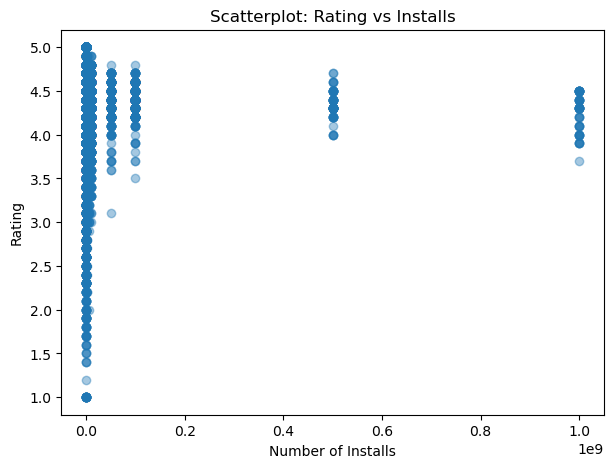

In [ ]:

#CLEAN installs column
df['Installs_clean'] = (
    df['Installs']
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.extract('(\d+)'))       # extract only digit

#compute correlation
correlation = df[['Rating', 'Installs_clean']].corr()

print("Correlation between Rating and Installs:")
print(correlation)

#to interpret the correlation
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Clean Installs
df['Installs_clean'] = (
    df['Installs']
    .astype(str)
    .str.replace('+','', regex=False)
    .str.replace(',','', regex=False)
    .str.extract('(\d+)')
)

df['Installs_clean'] = pd.to_numeric(df['Installs_clean'], errors='coerce')

# Remove rows with missing values before plotting
clean_df = df[['Installs_clean','Rating']].dropna()

# Scatterplot
plt.figure(figsize=(7,5))
plt.scatter(clean_df['Installs_clean'], clean_df['Rating'], alpha=0.4)
plt.xlabel("Number of Installs")
plt.ylabel("Rating")
plt.title("Scatterplot: Rating vs Installs")
plt.show()



### Which category has the highest average rating?


In [ ]:

#ciode to calculate Average Raing per category
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Compute average rating for each category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("Average Rating of each Category:")
print(avg_rating_by_category)

#TO Display only the category with highest Rating
top_category = avg_rating_by_category.head(1)
print("Category with the Highest Average Rating:")
print(top_category)

Average Rating of each Category:
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
L

### Temperature contains outlier so we will remove them using IQR method


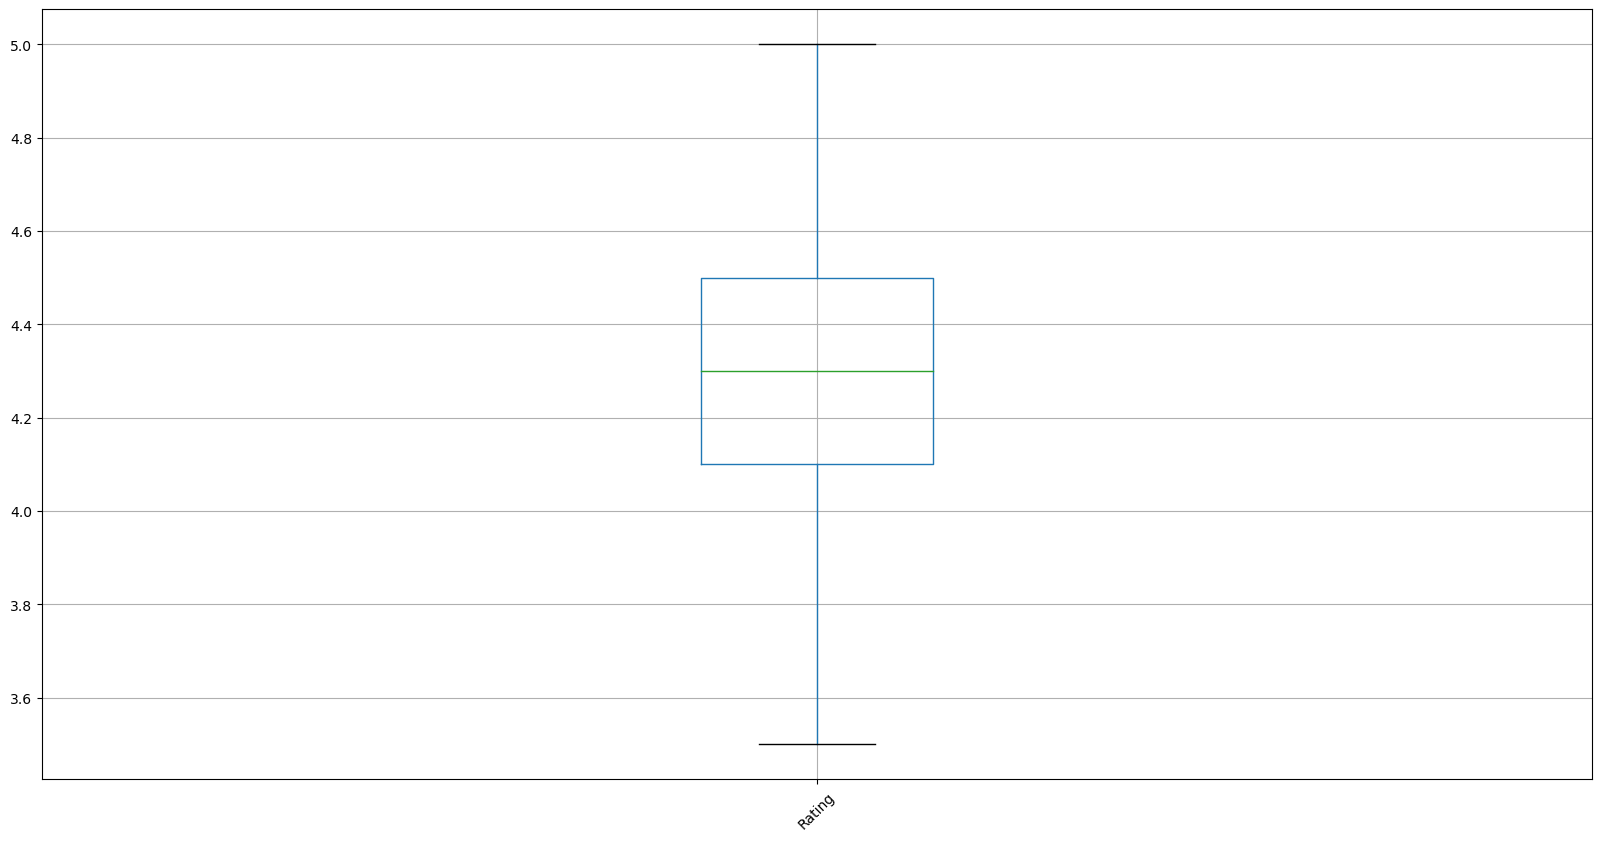

In [ ]:

Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Rating'] >= Q1 - 1.5 * IQR) & (df['Rating'] <= Q3 + 1.5 * IQR)]
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

### What is the Average rating when Content =ART_AND_DESIGN?

In [ ]:

print(df[df['Category']=='ART_AND_DESIGN']['Rating'].mean())

4.358064516129032


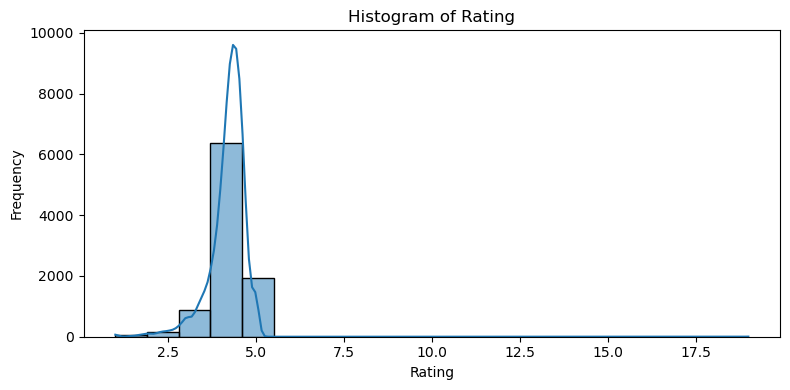

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Count plot


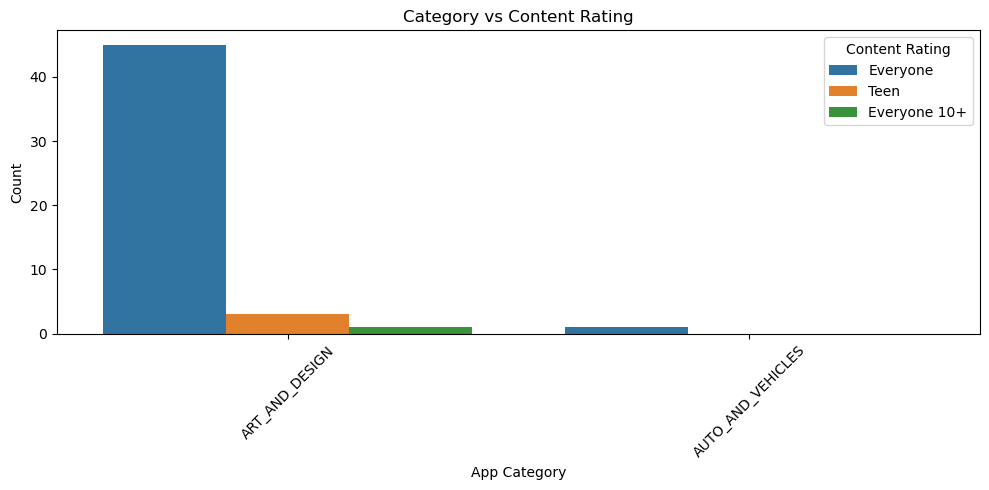

In [ ]:
# Count plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df.head(50), x='Category', hue='Content Rating')

plt.title('Category vs Content Rating')
plt.xlabel('App Category')
plt.ylabel('Count')
plt.legend(title='Content Rating')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pie Chart of Apps by Category

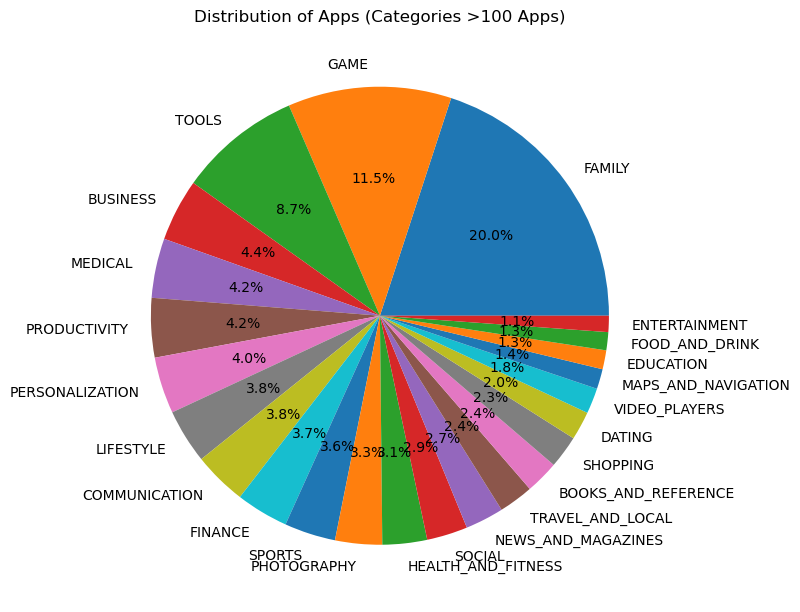

In [ ]:
filtered_df = df[df['Category'].map(df['Category'].value_counts()) > 100]

# Count apps by category
category_counts = filtered_df['Category'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Apps (Categories >100 Apps)')
plt.tight_layout()
plt.show()

### Pie Chart – App Type Distribution (Free vs Paid)

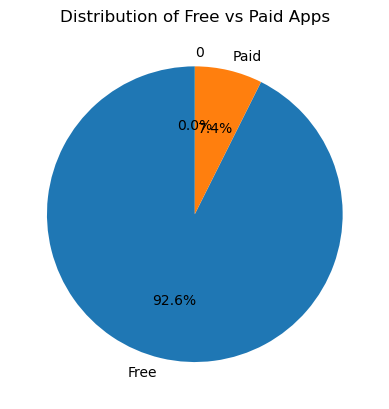

In [13]:
type_counts = df['Type'].value_counts()

plt.figure()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Free vs Paid Apps')
plt.show()


### Pie Chart – Top 5 App Categories

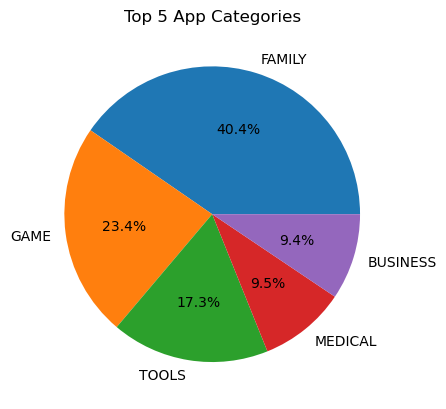

In [14]:
category_counts = df['Category'].value_counts().head(5)

plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Top 5 App Categories')
plt.show()


### Rating vs Reviews (Line Chart)

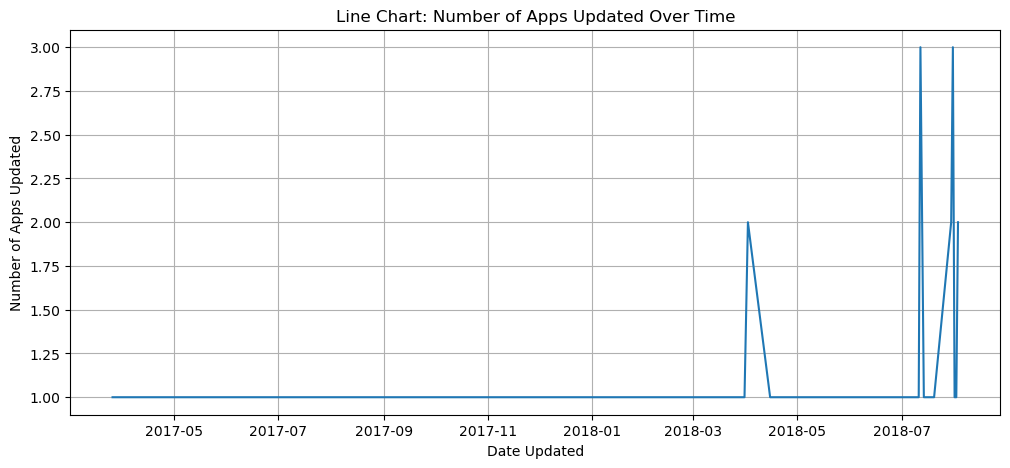

In [ ]:
# Convert Last Updated to datetime
df['Last Updated'] = pd.to_datetime(df.head(50)['Last Updated'], errors='coerce')

date_counts = df['Last Updated'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel("Date Updated")
plt.ylabel("Number of Apps Updated")
plt.title("Line Chart: Number of Apps Updated Over Time")
plt.grid(True)
plt.show()

In [ ]:
high_rating = df[df['Rating'] >= 4.5]
print(high_rating)

                                                     App             Category  \
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
13                                 Mandala Coloring Book       ART_AND_DESIGN   
16          Photo Designer - Write your name with shapes       ART_AND_DESIGN   
...                                                  ...                  ...   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews    

### What are the Central Tendency Statistics(mean,median,mode) and Spread(Standard Deviation)

In [ ]:
ratings = df['Rating'].dropna()

# Calculate statistics
mean = ratings.mean()
median = ratings.median()
mode = ratings.mode()[0]
std_dev = ratings.std()

print(f"Mean Rating: {mean:.2f}")
print(f"Median Rating: {median:.2f}")
print(f"Mode Rating: {mode:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean Rating: 4.19
Median Rating: 4.30
Mode Rating: 4.40
Standard Deviation: 0.54


## Conclusion

he Exploratory Data Analysis of the Google Play Store dataset provides meaningful insights into app characteristics, user preferences, and marketplace behavior. The analysis reveals several important patterns:

1. App Ratings and User Satisfaction

Most apps have ratings between 4.0 and 4.7, showing that the majority of applications receive positive user feedback. A small number of apps have very low ratings or missing ratings, indicating quality issues or insufficient user engagement.

2. Popularity and Installs

The number of installs varies widely across categories. Certain app categories such as Games, Tools, Communication, and Productivity dominate in terms of downloads. Paid apps generally have fewer installs compared to free apps, confirming that users prefer free content.

3. App Categories and Genres

The dataset is highly diverse, covering more than 30 categories.
Categories like Family, Game, and Tools contain the largest number of apps, while niche categories have fewer offerings. This imbalance reflects the competitive nature and user demand in those segments.

4. Influence of Reviews and Ratings

A positive correlation is observed between Reviews and Installs, suggesting that apps with higher downloads naturally accumulate more user reviews and feedback.
However, high reviews do not always guarantee high ratings, indicating the importance of app